# NUMERICAL PREDICTION - HR Dataset

For the numeric prediction problem, we predict PayRate. We delete the columns 'LastPerformanceReview_Date","DaysLateLast30","DateofTermination","DOB","DateofHire","Employee_Name","EmpID"because they are either columns with date format or are irrelevant for numeric prediction. 

In [58]:
import warnings 
warnings.simplefilter("ignore")  

import pandas as pd

data0=pd.read_csv('HRDATA.csv')

data0=data0.drop(["LastPerformanceReview_Date","DaysLateLast30","DateofTermination","DOB","DateofHire","Employee_Name","EmpID"], axis = 1)

data0=data0.fillna(data0.mean()) #Replace missing values of numeric attributes with the mean of the attribute

data0=data0.fillna('Missing') #Replace missing values of categorical attributes with string 'Missing'

data0.head(9).transpose()

,0,1,2,3,4,5,6,7,8
MarriedID,1,0,0,1,0,1,1,0,0
MaritalStatusID,1,2,0,1,0,1,1,0,0
GenderID,0,1,1,0,0,0,0,0,0
EmpStatusID,1,1,1,1,1,5,5,1,1
DeptID,1,1,1,1,1,1,6,6,6
PerfScoreID,3,3,3,3,3,3,3,3,1
FromDiversityJobFairID,1,0,0,0,0,1,0,0,0
PayRate,28.5,23,29,21.5,16.56,20.5,55,55,55
Termd,0,0,0,1,0,1,1,0,0
PositionID,1,1,1,2,2,2,3,3,3


In [59]:
from python_all import cat_to_dummy

data0=cat_to_dummy(data0,["CitizenDesc", "Sex", "EmploymentStatus","PerformanceScore","RaceDesc","MaritalDesc","Department","Position","State","ManagerName","TermReason","RecruitmentSource"]) #Convert categorical values to 0/1. Used for classification & numeric prediction 
data0["HispanicLatino"] = data0["HispanicLatino"].apply(lambda x: 1 if x == "Yes" else 0) 
#apply() apply a if function to transform Yes/No to 1/0.
data0.head().transpose()

,0,1,2,3,4
MarriedID,1.0,0.0,0.0,1.0,0.0
MaritalStatusID,1.0,2.0,0.0,1.0,0.0
GenderID,0.0,1.0,1.0,0.0,0.0
EmpStatusID,1.0,1.0,1.0,1.0,1.0
DeptID,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
RecruitmentSource_Search Engine - Google Bing Yahoo,0.0,0.0,0.0,0.0,0.0
RecruitmentSource_Social Networks - Facebook Twitter etc,0.0,0.0,0.0,0.0,0.0
RecruitmentSource_Vendor Referral,0.0,0.0,0.0,0.0,0.0
RecruitmentSource_Website Banner Ads,0.0,1.0,0.0,0.0,1.0


In [60]:
data0.corr()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,...,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Pay Per Click,RecruitmentSource_Pay Per Click - Google,RecruitmentSource_Professional Society,RecruitmentSource_Search Engine - Google Bing Yahoo,RecruitmentSource_Social Networks - Facebook Twitter etc,RecruitmentSource_Vendor Referral,RecruitmentSource_Website Banner Ads,RecruitmentSource_Word of Mouth
MarriedID,1.000000,0.163655,-0.023593,0.089000,-0.125659,-0.045959,-0.011468,0.026342,0.071844,-0.028783,...,-0.046137,0.056121,-0.046137,-0.008718,0.028571,0.001953,-0.012992,-0.059969,0.027696,-0.005200
MaritalStatusID,0.163655,1.000000,-0.025479,0.115255,0.011966,0.047773,0.041335,-0.082459,0.098774,0.021703,...,0.071795,0.014522,0.192425,-0.000044,-0.072303,-0.040721,-0.016758,-0.097945,0.059280,0.025154
GenderID,-0.023593,-0.025479,1.000000,-0.024618,-0.046189,-0.054915,0.034872,0.136151,-0.016471,-0.075992,...,0.065627,-0.072253,0.065627,-0.000251,0.037655,-0.113118,-0.025343,-0.073974,0.046257,0.013741
EmpStatusID,0.089000,0.115255,-0.024618,1.000000,0.092266,-0.081250,0.188436,-0.214835,0.955596,0.222350,...,0.082612,0.004598,0.082612,-0.124109,-0.109399,0.172359,0.142359,-0.007980,-0.100172,0.088357
DeptID,-0.125659,0.011966,-0.046189,0.092266,1.000000,-0.072365,-0.129035,-0.202810,0.060433,0.028941,...,0.020718,0.027415,0.020718,0.038779,0.010583,0.064012,0.102127,-0.154374,0.061302,0.076195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RecruitmentSource_Search Engine - Google Bing Yahoo,0.001953,-0.040721,-0.113118,0.172359,0.064012,-0.032831,-0.095147,-0.121611,0.168353,0.110492,...,-0.016849,-0.051214,-0.016849,-0.079838,-0.077779,1.000000,-0.056808,-0.066786,-0.061964,-0.061964
RecruitmentSource_Social Networks - Facebook Twitter etc,-0.012992,-0.016758,-0.025343,0.142359,0.102127,0.035631,-0.061618,-0.053499,0.160854,0.030193,...,-0.010911,-0.033166,-0.010911,-0.051704,-0.050371,-0.056808,1.000000,-0.043251,-0.040129,-0.040129
RecruitmentSource_Vendor Referral,-0.059969,-0.097945,-0.073974,-0.007980,-0.154374,-0.045868,-0.072440,0.139063,-0.031401,0.133894,...,-0.012828,-0.038992,-0.012828,-0.060785,-0.059218,-0.066786,-0.043251,1.000000,-0.047177,-0.047177
RecruitmentSource_Website Banner Ads,0.027696,0.059280,0.046257,-0.100172,0.061302,-0.077936,-0.067211,0.139213,-0.113413,-0.310125,...,-0.011902,-0.036177,-0.011902,-0.056397,-0.054943,-0.061964,-0.040129,-0.047177,1.000000,-0.043771


In [61]:
corr=data0.corr()
corr['PayRate'].sort_values(ascending=False)

PayRate                             1.000000
Department_Sales                    0.526070
Position_Area Sales Manager         0.481403
SpecialProjectsCount                0.448484
Department_IT/IS                    0.414146
                                      ...   
PositionID                         -0.383827
ManagerID                          -0.395580
State_MA                           -0.513326
Position_Production Technician I   -0.701127
Department_Production              -0.762271
Name: PayRate, Length: 169, dtype: float64

Based on the correlation matrix, quite some X variables have significant linear relationship with PayRate. Among them, Department_Sales has the strongest linear relationship (highest absolute value of the correlation) with PayRate. Other top correlated X attributes are very intuitive.

In [62]:
from sklearn.model_selection import train_test_split 

X = data0.drop(['PayRate'], axis = 1) 
y = data0['PayRate']                  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Numeric Prediction --- Linear Regerssion Lasso

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

model = Lasso()
lasso_model = GridSearchCV(model, param_grid={'alpha': [0,1]})
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("Lasso RMSE:", mean_squared_error(y_test, y_pred_lasso,squared=False))
print('\nIntercept:',lasso_model.best_estimator_.intercept_)
print('\nCoefficients:\n',lasso_model.best_estimator_.coef_)
print(X_train.columns)

Lasso RMSE: 8.646963996604

Intercept: 68.27387737352828

Coefficients:
 [ 3.24111563e-01 -5.93794334e-01  1.90193396e+00 -1.53431163e+00
 -2.34859081e+00  6.79654283e-01 -4.11272955e-01  6.83323494e-01
 -1.21089169e+00 -2.22007631e-05 -8.97179574e-03  1.46073323e-01
 -6.20501165e-02  7.01023088e-01  7.53106491e-01  5.62110926e-01
 -1.93323917e-01  2.49987823e-03  1.88493593e+00  3.50771500e-13
 -3.64888746e+00 -3.63727712e+00 -1.03238436e-01 -8.13986274e+00
  1.39349302e+00 -6.45343450e-01 -8.62698597e-01  5.73148800e-02
  1.94325277e+00 -2.11261921e+00 -8.44514652e-02  2.05470285e-01
  2.50562049e+00 -1.27888570e+00  5.29873590e-02  1.67262338e+00
  7.00207487e-01  1.54574031e+00 -2.93293702e-01  4.73089004e-01
 -1.40901948e+01  0.00000000e+00  6.20269099e+00 -1.09516806e+01
  9.49675584e+00  2.19825514e+01 -2.47484175e+01 -3.42255498e+01
 -3.42697267e+00 -2.32461058e+01 -2.74336744e+00 -7.16424254e-01
 -2.44216426e+01 -1.70069894e+01 -7.69824065e+00 -2.21391719e+01
  2.60301894e+01 

In [64]:
print(X_train.iloc[:,-25:].columns)

Index(['TermReason_return to school', 'TermReason_unhappy',
       'RecruitmentSource_Billboard', 'RecruitmentSource_Careerbuilder',
       'RecruitmentSource_Company Intranet - Partner',
       'RecruitmentSource_Diversity Job Fair',
       'RecruitmentSource_Employee Referral', 'RecruitmentSource_Glassdoor',
       'RecruitmentSource_Indeed', 'RecruitmentSource_Information Session',
       'RecruitmentSource_Internet Search', 'RecruitmentSource_MBTA ads',
       'RecruitmentSource_Monster.com', 'RecruitmentSource_Newspager/Magazine',
       'RecruitmentSource_On-campus Recruiting',
       'RecruitmentSource_On-line Web application', 'RecruitmentSource_Other',
       'RecruitmentSource_Pay Per Click',
       'RecruitmentSource_Pay Per Click - Google',
       'RecruitmentSource_Professional Society',
       'RecruitmentSource_Search Engine - Google Bing Yahoo',
       'RecruitmentSource_Social Networks - Facebook Twitter etc',
       'RecruitmentSource_Vendor Referral',
       'Recruit

# Numeric Prediction --- Regression Tree

Tree RMSE: 7.9596789284664045

Feature Importance:
 [9.91637489e-04 4.78016201e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.96306649e-04
 1.35532022e-01 1.40950484e-02 2.62266884e-04 7.75495639e-03
 5.68246984e-03 5.56455498e-04 2.81064476e-04 0.00000000e+00
 0.00000000e+00 3.81695597e-04 0.00000000e+00 8.99406325e-06
 3.23786277e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.01230455e-02 8.99406325e-06 4.21596715e-05 8.99406325e-06
 0.00000000e+00 0.00000000e+00 1.12425791e-04 5.46389342e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.21596715e-05
 8.09465692e-05 0.00000000e+00 3.73016181e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.55568082e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.99554834e-02 0.00000000e+00 0.00000000e+00 1.21070292e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.

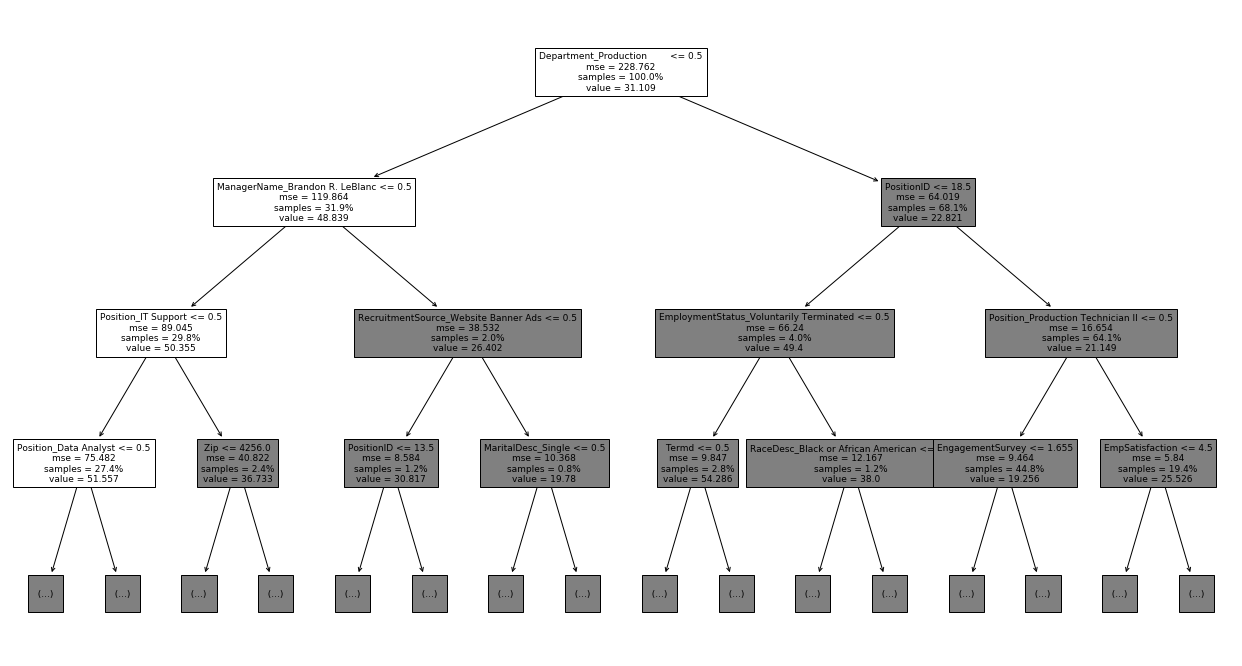

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

model = DecisionTreeRegressor()
dt = GridSearchCV(model, param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]})
dt.fit(X_train, y_train)
y_pred_tree = dt.predict(X_test)

print("Tree RMSE:", mean_squared_error(y_test, y_pred_tree,squared=False))
print('\nFeature Importance:\n',dt.best_estimator_.feature_importances_)
print(X_train.columns)

plt.subplots(figsize=(22, 12)) 
plot_tree(dt.best_estimator_, max_depth=3, feature_names=X_train.columns, proportion=True, fontsize=9) 
plt.show()

#Similarly, we can also use export_txt() to get the text three.

In [66]:
print(X_train.iloc[:,:-100].columns)

Index(['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID',
       'PerfScoreID', 'FromDiversityJobFairID', 'Termd', 'PositionID', 'Zip',
       'HispanicLatino', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'CitizenDesc_Eligible NonCitizen',
       'CitizenDesc_Non-Citizen', 'CitizenDesc_US Citizen', 'Sex_F', 'Sex_M ',
       'EmploymentStatus_Active', 'EmploymentStatus_Future Start',
       'EmploymentStatus_Leave of Absence',
       'EmploymentStatus_Terminated for Cause',
       'EmploymentStatus_Voluntarily Terminated', 'PerformanceScore_Exceeds',
       'PerformanceScore_Fully Meets', 'PerformanceScore_Needs Improvement',
       'PerformanceScore_PIP', 'RaceDesc_American Indian or Alaska Native',
       'RaceDesc_Asian', 'RaceDesc_Black or African American',
       'RaceDesc_Hispanic', 'RaceDesc_Two or more races', 'RaceDesc_White',
       'MaritalDesc_Divorced', 'MaritalDesc_Married', 'MaritalDesc_Separated',
       'MaritalD

# Numeric Prediction --- Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() 
rf = GridSearchCV(model, param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]})
rf.fit(X_train, y_train)
y_pred_forest = rf.predict(X_test)

print("Forest RMSE:", mean_squared_error(y_test, y_pred_forest,squared=False))

Forest RMSE: 8.482904341115612


As per the output we can see that the RMSE for Random Forest Model is better than the RMSE of Regression Tree Model: 

RMSE for Lasso Model - 8.6469

RMSE for Regression Tree Model - 7.9597

RMSE for Random Forest Model - 8.4829

Also, The feature importance from Decision Tree Model states that 'Department_Production'(6.50326559e-01) is the most important feature to estimate PayRate.
From the coefficients of Lasso Model, 'RecruitmentSource_Diversity Job Fair'(-9.86927802e-01 ) has the steepest linear relationship(highest absolute value of a co-efficient) with PayRate. 